<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Deep-Learning-Tensorflow-Projects/blob/master/Fashion_MNIST_using_CNN_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.1.0


**Loading the Data**

```
The Fashion MNIST data is available directly in the tf.keras datasets API
```



In [0]:
mnist = tf.keras.datasets.fashion_mnist

**Training and Testing Split of Data**

```
Training = 60000 Samples
Testing = 10000 Samples
```



In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print("Training Image Size {}".format(training_images.shape))
print("Training Labels Size {}".format(training_labels.shape))
print("Test Image Size {}".format(test_images.shape))
print("Test Labels Size {}".format(test_labels.shape))

Training Image Size (60000, 28, 28)
Training Labels Size (60000,)
Test Image Size (10000, 28, 28)
Test Labels Size (10000,)


**Visualising the Data**

Image Label 0


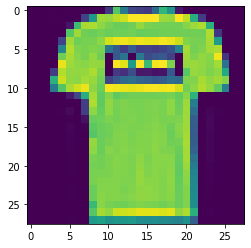

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print("Image Label {}".format(training_labels[1]))

**Normalizing the Data**

In [0]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

**Defining The Model**



In [7]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

**Compliling the Model**

```
optimizer = Stochastic Gradient Descent
loss = Mean Squared Error
metrices = [accuracy]
```




In [0]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('sparse_categorical_accuracy') > 0.994):
                print("\nReached 99.4% greater accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

**Training the Model**

In [14]:
history = model.fit(training_images, training_labels, epochs = 10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.2829 - sparse_categorical_accuracy: 0.8956
Epoch 2/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.2370 - sparse_categorical_accuracy: 0.9120
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.2060 - sparse_categorical_accuracy: 0.9227
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1804 - sparse_categorical_accuracy: 0.9326
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1576 - sparse_categorical_accuracy: 0.9410
Epoch 6/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1396 - sparse_categorical_accuracy: 0.9467
Epoch 7/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1227 - sparse_categorical_accuracy: 0.9537
Epoch 8/10
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.1081 - spars

**Evaluating the Model**

In [15]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 495us/sample - loss: 0.3361 - sparse_categorical_accuracy: 0.9073


[0.33610861933231356, 0.9073]